In [ ]:
BOKEH_LOG_LEVEL='trace'

In [1]:
from IPython.display import HTML
import bokeh
import pandas as pd
#
%pylab inline

from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
cypern = pd.read_excel("./excel-export.xls",sheetname="Cypern")
mexiko = pd.read_excel("./excel-export.xls",sheetname="Mexiko")

In [3]:
cypern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Fotonummer                       614 non-null object
Postnr.                          614 non-null int64
Nyckelord                        613 non-null object
Beskrivning                      608 non-null object
Land, foto                       572 non-null object
Region, foto                     61 non-null object
Ort, foto                        290 non-null object
Geograf namn, alternativ         18 non-null object
Fotodatum                        504 non-null object
Personnamn / fotograf            592 non-null object
Personnamn / avbildad            90 non-null object
Sökord                           0 non-null float64
Händelse / var närvarande vid    0 non-null float64
Länk                             614 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 67.2+ KB


In [4]:
mexiko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 14 columns):
Fotonummer                       1442 non-null object
Postnr.                          1442 non-null int64
Motivord                         530 non-null object
Beskrivning                      642 non-null object
Land, foto                       1440 non-null object
Region, foto                     920 non-null object
Ort, foto                        1087 non-null object
Etnisk grupp, avb.               7 non-null object
Fotodatum                        1439 non-null float64
Personnamn / fotograf            1436 non-null object
Personnamn / avbildad            38 non-null object
Sökord                           489 non-null object
Händelse / var närvarande vid    1440 non-null object
Länk                             1442 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 157.8+ KB


# General fill-ins analysis

In [5]:
cyp = pd.DataFrame({"Ifyllda":cypern.count(),"Tomma":cypern.isnull().sum()})
cyp["Prc"] = cyp["Tomma"] / 1442
cyp = cyp.sort_values(by="Prc",ascending=False, inplace=False)
cyp

,Ifyllda,Tomma,Prc
Sökord,0,614,0.425798
Händelse / var närvarande vid,0,614,0.425798
"Geograf namn, alternativ",18,596,0.413315
"Region, foto",61,553,0.383495
Personnamn / avbildad,90,524,0.363384
"Ort, foto",290,324,0.224688
Fotodatum,504,110,0.076283
"Land, foto",572,42,0.029126
Personnamn / fotograf,592,22,0.015257
Beskrivning,608,6,0.004161


In [6]:
mex = pd.DataFrame({"Ifyllda":mexiko.count(),"Tomma":mexiko.isnull().sum()})
mex["Prc"] = mex["Tomma"] / 1442
mex = mex.sort_values(by="Prc",ascending=False, inplace=False)
mex

,Ifyllda,Tomma,Prc
"Etnisk grupp, avb.",7,1435,0.995146
Personnamn / avbildad,38,1404,0.973648
Sökord,489,953,0.660888
Motivord,530,912,0.632455
Beskrivning,642,800,0.554785
"Region, foto",920,522,0.361997
"Ort, foto",1087,355,0.246186
Personnamn / fotograf,1436,6,0.004161
Fotodatum,1439,3,0.002080
"Land, foto",1440,2,0.001387


In [16]:
fillins_df = pd.concat([cyp,mex], keys=("Mexiko","Cypern"), axis=1)
fillins_df

Mexiko                   Cypern          \
                              Ifyllda  Tomma       Prc Ifyllda   Tomma   
Beskrivning                     608.0    6.0  0.004161   642.0   800.0   
Etnisk grupp, avb.                NaN    NaN       NaN     7.0  1435.0   
Fotodatum                       504.0  110.0  0.076283  1439.0     3.0   
Fotonummer                      614.0    0.0  0.000000  1442.0     0.0   
Geograf namn, alternativ         18.0  596.0  0.413315     NaN     NaN   
Händelse / var närvarande vid     0.0  614.0  0.425798  1440.0     2.0   
Land, foto                      572.0   42.0  0.029126  1440.0     2.0   
Länk                            614.0    0.0  0.000000  1442.0     0.0   
Motivord                          NaN    NaN       NaN   530.0   912.0   
Nyckelord                       613.0    1.0  0.000693     NaN     NaN   
Ort, foto                       290.0  324.0  0.224688  1087.0   355.0   
Personnamn / avbildad            90.0  524.0  0.363384    38.0  1404.0   
Personnamn / fotograf           592.0   22.0  0.015257  1436.0     6.0   
Postnr.                         614.0    0.0  0.000000  1442.0     0.0   
Region, foto                     61.0  553.0  0.383495   920.0   522.0   
Sökord                            0.0  614.0  0.425798   489.0   953.0   

                                         
                                    Prc  
Beskrivning                    0.554785  
Etnisk grupp, avb.             0.995146  
Fotodatum                      0.002080  
Fotonummer                     0.000000  
Geograf namn, alternativ            NaN  
Händelse / var närvarande vid  0.001387  
Land, foto                     0.001387  
Länk                           0.000000  
Motivord                       0.632455  
Nyckelord                           NaN  
Ort, foto                      0.246186  
Personnamn / avbildad          0.973648  
Personnamn / fotograf          0.004161  
Postnr.                        0.000000  
Region, foto                   0.361997  
Sökord                         0.660888

In [17]:
fillins_p = figure(height=600, 
                   width=1000, 
                   x_range=list(fillins_df.index), 
                   y_range=[0,100],
                   tools="pan,box_zoom,save")
fillins_p.logo = None

fillins_p.title = "Fillins Mexiko vs Cypern"
fillins_p.line(fillins_df["Mexiko"].index, fillins_df["Mexiko"]["Prc"] * 100, color="blue", legend="Mexiko")
fillins_p.line(fillins_df["Cypern"].index, fillins_df["Cypern"]["Prc"] * 100, color="green", legend="Cypern")

# X-Axis
fillins_p.xaxis.major_label_orientation = 0.75
fillins_p.xaxis.axis_label_standoff = 3
fillins_p.xaxis.axis_label = "Column in metadata document"

# Y-axis
fillins_p.yaxis.axis_label = "Procent tomma"

output_file("Fillins_comparison.html")
show(fillins_p)

# Row fill-ins analysis

In [11]:
cyp_dict = {}
for index, row in cypern.iterrows():
    cyp_dict[index] = row.isnull().sum()
cypern_s = pd.Series(cyp_dict, index=range(len(cyp_dict)))
cyp_empty_s = pd.Series()
cypern_df = pd.concat([cypern_s,cyp_empty_s],axis=1)
cypern_df.describe()

,0
count,614.000000
mean,5.547231
std,1.054881
min,3.000000
25%,5.000000
50%,5.000000
75%,6.000000
max,9.000000


/home/mos/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mos/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


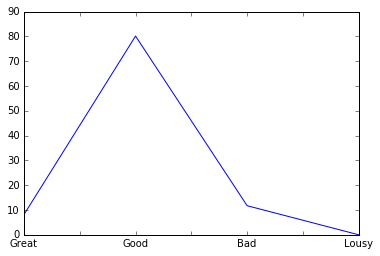

In [26]:
cyp_res = {}
cyp_bins = [0, 2, 4, 6, 9] # max is 9 non-empty columns
cyp_group_names = ['Lousy', 'Bad', 'Good', 'Great']
cyp_categories = pd.cut(cypern_s, cyp_bins, labels=cyp_group_names)
for tupl in cyp_categories.value_counts().items():
    #print("{} {} perc: {:.0f}".format(tupl[0], tupl[1], (tupl[1]/sum(cyp_categories.value_counts())*100)))
    cyp_res[tupl[0]] = {"cnt":tupl[1], "prc":(tupl[1]/sum(cyp_categories.value_counts()) *100)}
cyp_df = pd.DataFrame(cyp_res)
cyp_df["Above_bad"] = 0
cyp_df["Above_bad"]["cnt"] = cyp_df["Good"]["cnt"] + cyp_df["Great"]["cnt"]
cyp_df["Above_bad"]["prc"] = cyp_df["Good"]["prc"] + cyp_df["Great"]["prc"]
cyp_df[["Great","Good","Bad","Lousy"]].T.prc.plot()

In [25]:
cyp_df

,Bad,Good,Great,Lousy,Above_bad
cnt,72.000000,492.000000,50.000000,0.0,542
prc,11.726384,80.130293,8.143322,0.0,0


In [16]:
mex_dict = {}
for index, row in mexiko.iterrows():
    mex_dict[index] = row.isnull().sum()
mexiko_s = pd.Series(mex_dict, index=range(len(mex_dict)))
mex_empty_s = pd.Series()
mexiko_df = pd.concat([mexiko_s,mex_empty_s],axis=1)
mexiko_df.describe()

,0
count,1442.000000
mean,4.434119
std,0.873800
min,2.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,9.000000


In [74]:
mex_res = {}
mex_bins = [0, 2, 4, 6, 9] # max is 9 non-empty columns
mex_group_names = ['Lousy', 'Bad', 'Good', 'Great']
mex_categories = pd.cut(mexiko_s, mex_bins, labels=mex_group_names)
for tupl in mex_categories.value_counts().items():
    #print("{} {} perc: {:.0f}".format(tupl[0], tupl[1], (tupl[1]/sum(mex_categories.value_counts())*100)))
    mex_res[tupl[0]] = {"cnt":tupl[1], "prc":(tupl[1]/sum(mex_categories.value_counts()) *100)}
mex_df = pd.DataFrame(mex_res)
mex_df = mex_df.T.stack(0)
mex_df["Above_bad"] = 0
mex_df["Above_bad"]["cnt"] = 0
mex_df["Above_bad"]["prc"] = 0
mex_df["Above_bad"]["cnt"] = "" #mex_df["Good"]["cnt"] + mex_df["Great"]["cnt"]
mex_df["Above_bad"]["prc"] = "" #mex_df["Good"]["prc"] + mex_df["Great"]["prc"]
mex_df

Bad        cnt    608.000000
           prc     42.163662
Good       cnt    802.000000
           prc     55.617198
Great      cnt      2.000000
           prc      0.138696
Lousy      cnt     30.000000
           prc      2.080444
Above_bad           0.000000
dtype: float64

In [66]:
mex_df["Above_bad"]["cnt"]

KeyError: 'cnt'

In [58]:
mex_stacked = mex_df.T.stack()
mex_stacked

cnt  Bad               608
     Good              802
     Great               2
     Lousy              30
     Above_bad            
prc  Bad           42.1637
     Good          55.6172
     Great        0.138696
     Lousy         2.08044
     Above_bad            
dtype: object

In [56]:
mex_stacked["Above_bad"] = ""
mex_stacked

Bad        cnt         608
           prc     42.1637
Good       cnt         802
           prc     55.6172
Great      cnt           2
           prc    0.138696
Lousy      cnt          30
           prc     2.08044
Above_bad  cnt            
           prc            
dtype: object

In [22]:
cyp_tot_values_count = 0

cyp_cols = pd.DataFrame()
for col in cypern.columns:
    print("{} {}".format(col, len(cypern[col].value_counts())))
    for value in cypern[col].value_counts().values:
        cyp_tot_values_count += value
print("\n-------------------------------")    
print("Data shape: {}".format(cypern.shape))
print("Max possible data density (rows * columns): {}".format(cypern.shape[0] * cypern.shape[1]))

print("Actual data density (Total values count +1 for NaN): {} ".format(cyp_tot_values_count + 1))
print("Data density percentage: {}".format((cyp_tot_values_count + 1) / (cypern.shape[0] * cypern.shape[1])))

Fotonummer 614
Postnr. 614
Nyckelord 37
Beskrivning 543
Land, foto 4
Region, foto 3
Ort, foto 11
Geograf namn, alternativ 1
Fotodatum 9
Personnamn / fotograf 2
Personnamn / avbildad 29
Sökord 0
Händelse / var närvarande vid 0
Länk 614

-------------------------------
Data shape: (614, 14)
Max possible data density (rows * columns): 8596
Actual data density (Total values count +1 for NaN): 5191 
Data density percentage: 0.6038855281526291


In [23]:
mex_tot_values_count = 0

mex_cols = pd.DataFrame()
for col in mexiko.columns:
    print("{} {}".format(col, len(mexiko[col].value_counts())))
    for value in mexiko[col].value_counts().values:
        mex_tot_values_count += value
print("\n-------------------------------")    
print("Data shape: {}".format(cypern.shape))
print("Max possible data density (rows * columns): {}".format(mexiko.shape[0] * mexiko.shape[1]))

print("Actual data density (Total values count +1 for NaN): {} ".format(mex_tot_values_count + 1))
print("Data density percentage: {}".format((mex_tot_values_count + 1) / (mexiko.shape[0] * mexiko.shape[1])))

Fotonummer 1442
Postnr. 1442
Motivord 64
Beskrivning 77
Land, foto 1
Region, foto 9
Ort, foto 22
Etnisk grupp, avb. 1
Fotodatum 1
Personnamn / fotograf 3
Personnamn / avbildad 10
Sökord 35
Händelse / var närvarande vid 1
Länk 1442

-------------------------------
Data shape: (614, 14)
Max possible data density (rows * columns): 20188
Actual data density (Total values count +1 for NaN): 13795 
Data density percentage: 0.6833267287497523


In [3]:
from bokeh.plotting import output_notebook, figure, show
output_notebook()
fig = figure(heigth=600,
             width=800,
             y_range=(0,100)
             
            
            )
fig.circle(x=,
           y=["0.6038855281526291","0.6833267287497523"],
           )


Loading BokehJS ...

In [75]:
data = {"A":[42,4,8],"Boll":[562,76,34],"Citron":[543,94,2],"D":[34,76,2],"David":[654,34,3]}
d = pd.DataFrame(data)

In [80]:
d

,A,Boll,Citron,D,David
0,42,562,543,34,654
1,4,76,94,76,34
2,8,34,2,2,3


In [81]:
d.columns

Index(['A', 'Boll', 'Citron', 'D', 'David'], dtype='object')

In [100]:
d.loc[0:1,"B":"D"]

,Boll,Citron,D
0,562,543,34
1,76,94,76


In [104]:
mex_df

Bad        cnt    608.000000
           prc     42.163662
Good       cnt    802.000000
           prc     55.617198
Great      cnt      2.000000
           prc      0.138696
Lousy      cnt     30.000000
           prc      2.080444
Above_bad           0.000000
dtype: float64

In [107]:
mex_df.xs("prc",level=1) # xs, cross-selection

Bad      42.163662
Good     55.617198
Great     0.138696
Lousy     2.080444
dtype: float64

In [110]:
mex_df.unstack()

,cnt,prc,
Bad,608.0,42.163662,NaN
Good,802.0,55.617198,NaN
Great,2.0,0.138696,NaN
Lousy,30.0,2.080444,NaN
Above_bad,NaN,NaN,0.0


In [118]:
new = pd.concat([mex_df,cyp_df], keys=["mex","cyp"])

/home/mos/anaconda3/lib/python3.5/site-packages/pandas/indexes/api.py:71: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)


NotImplementedError: > 1 ndim Categorical are not supported at this time